In [1]:
import numpy as np
import scipy as sp
import new_correction as nc
import matplotlib.pyplot as plt

In [2]:
path = '/datadisk/MIME/deterministic_epi05_test/'
protein_concentrations = [0.1, 1, 10]
number_sequences = 1
c = 0.0001

In [3]:
logK_sequences_r1, logK_mutations_r1, interactions_r1, logK_sequences_r2, logK_mutations_r2, interactions_r2, single_effects, interactions, round_1_sequence_effects, round_2_sequence_effects= nc.logK_inference(path, protein_concentrations, c)

Pool 0.1, 0.1:
	Pruned 0.19230200000000003 sequences
	Pruned 0.346224 sequences
	Optimization terminated successfully.
	Optimization terminated successfully.
Pool 0.1, 1:
	Pruned 0.19230200000000003 sequences
	Pruned 0.107343 sequences
	Optimization terminated successfully.
	Optimization terminated successfully.
Pool 0.1, 10:
	Pruned 0.19230200000000003 sequences
	Pruned 0.24230300000000002 sequences
	Optimization terminated successfully.
	Optimization terminated successfully.
Pool 1, 0.1:
	Pruned 0.073955 sequences
	Pruned 0.360724 sequences
	Optimization terminated successfully.
	Optimization terminated successfully.
Pool 1, 1:
	Pruned 0.073955 sequences
	Pruned 0.11468499999999998 sequences
	Optimization terminated successfully.
	Optimization terminated successfully.
Pool 1, 10:
	Pruned 0.073955 sequences
	Pruned 0.214298 sequences
	Optimization terminated successfully.
	Optimization terminated successfully.
Pool 10, 0.1:
	Pruned 0.128579 sequences
	Pruned 0.405188 sequences
	Optimi

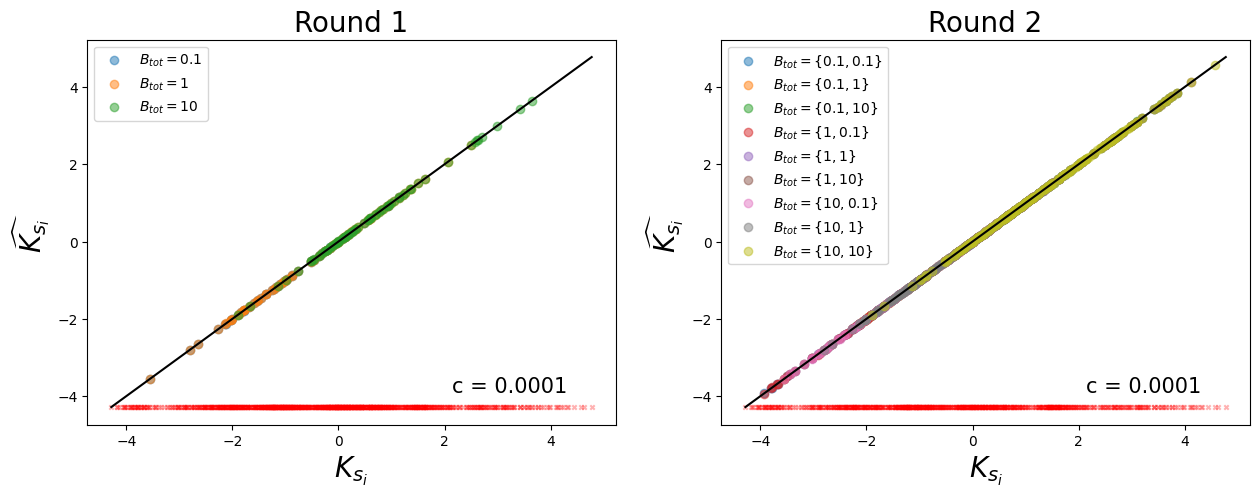

In [4]:
# set up 2 subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# plot round_1 sequence effects vs logK_sequences_r1
for i in range(0,len(protein_concentrations)**2, 3):
    axes[0].scatter(round_1_sequence_effects[i], logK_sequences_r1[i], alpha=0.5)
# set x and y labels
axes[0].set_xlabel('$K_{s_i}$', fontsize=20)
axes[0].set_ylabel('$\widehat{K_{s_i}}$', fontsize=20)
# set title
axes[0].set_title('Round 1', fontsize=20)
# plot 1:1 line
axes[0].plot([np.min(round_1_sequence_effects[0]), np.max(round_1_sequence_effects[0])], [np.min(round_1_sequence_effects[0]), np.max(round_1_sequence_effects[0])], color='black')
# add ticks where logK_sequences_r1 = nan
axes[0].scatter(round_1_sequence_effects[1][np.isnan(logK_sequences_r1[1])], np.min(round_1_sequence_effects[0])*np.ones(len(round_1_sequence_effects[1][np.isnan(logK_sequences_r1[1])])), color='red', marker='x', s=10, alpha=0.3)
# add c text top left
axes[0].text(0.8, 0.1, 'c = ' + str(c), horizontalalignment='center', verticalalignment='center', transform=axes[0].transAxes, fontsize=15)
# add legend
axes[0].legend(['$B_{tot} = 0.1$', '$B_{tot} = 1$', '$B_{tot} = 10$'], fontsize=10)

# plot round_2 sequence effects vs logK_sequences_r2
for i in range(len(protein_concentrations)**2):
    axes[1].scatter(round_2_sequence_effects[i], logK_sequences_r2[i], alpha=0.5)
# set x and y labels
axes[1].set_xlabel('$K_{s_i}$', fontsize=20)
axes[1].set_ylabel('$\widehat{K_{s_i}}$', fontsize=20)
# set title
axes[1].set_title('Round 2', fontsize=20)
# plot 1:1 line
axes[1].plot([np.min(round_2_sequence_effects[0]), np.max(round_2_sequence_effects[0])], [np.min(round_2_sequence_effects[0]), np.max(round_2_sequence_effects[0])], color='black')
# add ticks where logK_sequences_r2 = nan
axes[1].scatter(round_2_sequence_effects[1][np.isnan(logK_sequences_r2[1])], np.min(round_2_sequence_effects[0])*np.ones(len(round_2_sequence_effects[1][np.isnan(logK_sequences_r2[1])])), color='red', marker='x', s=10, alpha=0.3)
# add c text top left
axes[1].text(0.8, 0.1, 'c = ' + str(c), horizontalalignment='center', verticalalignment='center', transform=axes[1].transAxes, fontsize=15)
# add legend
axes[1].legend(['$B_{tot} = \{0.1, 0.1\}$', '$B_{tot} = \{0.1, 1\}$', '$B_{tot} = \{0.1, 10\}$', '$B_{tot} = \{1, 0.1\}$', '$B_{tot} = \{1, 1\}$', '$B_{tot} = \{1, 10\}$', '$B_{tot} = \{10, 0.1\}$', '$B_{tot} = \{10, 1\}$', '$B_{tot} = \{10, 10\}$'], fontsize=10)

plt.show()


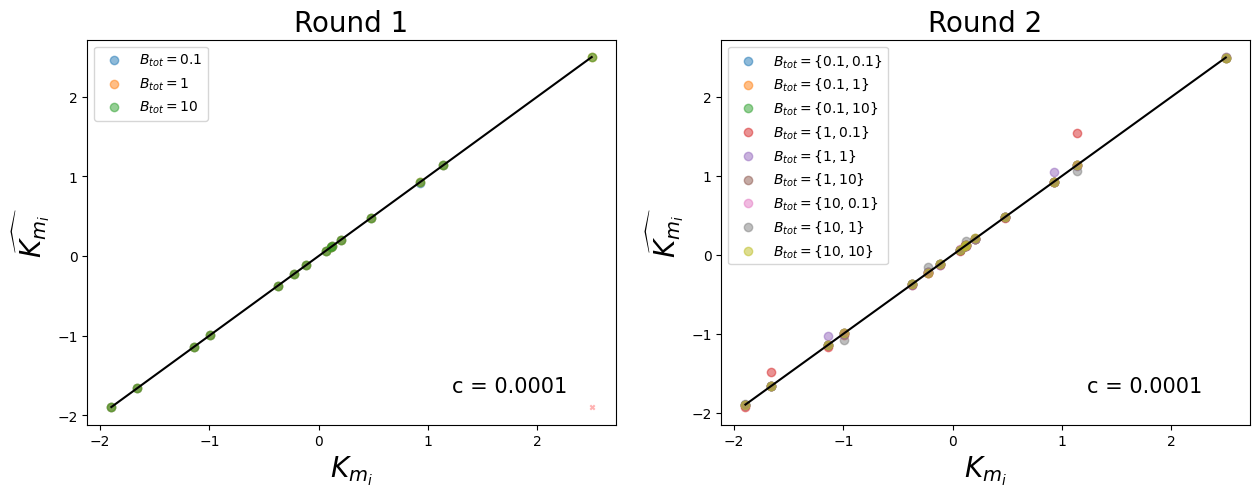

In [5]:
# set up 2 subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# plot ground_truth vs logK_mutations_r1
for i in range(0,len(protein_concentrations)**2, 3):
    axes[0].scatter(single_effects, logK_mutations_r1[i], alpha=0.5)
# set x and y labels
axes[0].set_xlabel('$K_{m_i}$', fontsize=20)
axes[0].set_ylabel('$\widehat{K_{m_i}}$', fontsize=20)
# set title
axes[0].set_title('Round 1', fontsize=20)
# plot 1:1 line
axes[0].plot([np.min(single_effects), np.max(single_effects)], [np.min(single_effects), np.max(single_effects)], color='black')
# add c text top left
axes[0].text(0.8, 0.1, 'c = ' + str(c), horizontalalignment='center', verticalalignment='center', transform=axes[0].transAxes, fontsize=15)
# add ticks where logK_mutations_r1 = nan
axes[0].scatter(single_effects[np.isnan(logK_mutations_r1[1])], np.min(single_effects)*np.ones(len(single_effects[np.isnan(logK_mutations_r1[1])])), color='red', marker='x', s=10, alpha=0.3)
# add legend
axes[0].legend(['$B_{tot} = 0.1$', '$B_{tot} = 1$', '$B_{tot} = 10$'], fontsize=10)

# plot single_effects vs logK_mutations_r2
for i in range(len(protein_concentrations)**2):
    axes[1].scatter(single_effects, logK_mutations_r2[i], alpha=0.5)
# set x and y labels
axes[1].set_xlabel('$K_{m_i}$', fontsize=20)
axes[1].set_ylabel('$\widehat{K_{m_i}}$', fontsize=20)
# set title
axes[1].set_title('Round 2', fontsize=20)
# plot 1:1 line
axes[1].plot([np.min(single_effects), np.max(single_effects)], [np.min(single_effects), np.max(single_effects)], color='black')
# add ticks where logK_mutations_r2 = nan
axes[1].scatter(single_effects[np.isnan(logK_mutations_r2[1])], np.min(single_effects)*np.ones(len(single_effects[np.isnan(logK_mutations_r2[1])])), color='red', marker='x', s=10, alpha=0.3)
# add c text bottom right
axes[1].text(0.8, 0.1, 'c = ' + str(c), horizontalalignment='center', verticalalignment='center', transform=axes[1].transAxes, fontsize=15)
# add legend top left
axes[1].legend(['$B_{tot} = \{0.1, 0.1\}$', '$B_{tot} = \{0.1, 1\}$', '$B_{tot} = \{0.1, 10\}$', '$B_{tot} = \{1, 0.1\}$', '$B_{tot} = \{1, 1\}$', '$B_{tot} = \{1, 10\}$', '$B_{tot} = \{10, 0.1\}$', '$B_{tot} = \{10, 1\}$', '$B_{tot} = \{10, 10\}$'], fontsize=10)

plt.show()

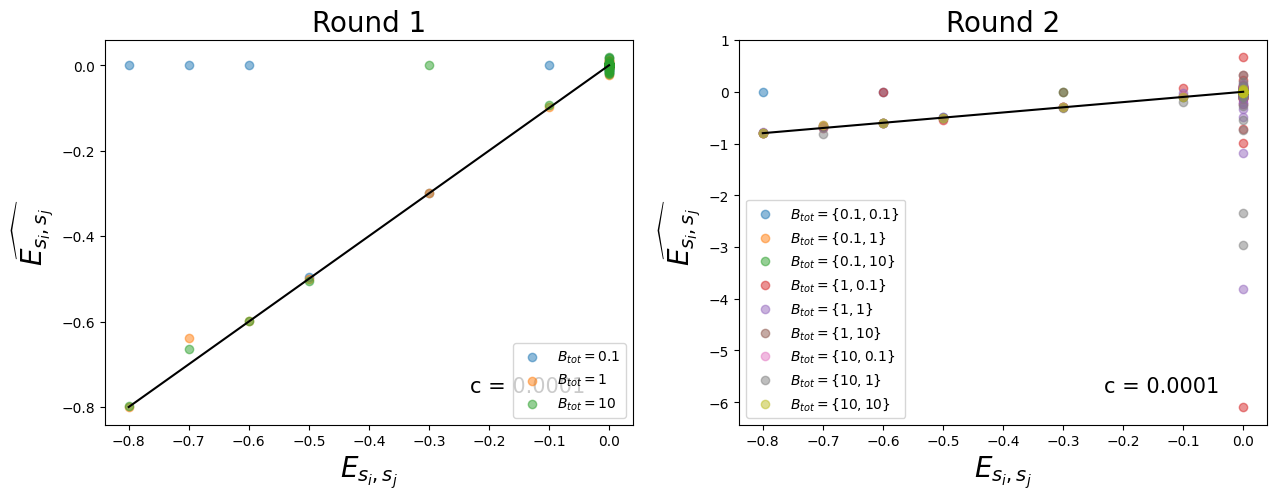

In [6]:
#transform interaction matrices into flattened arrays of their upper triangular parts
interaction_values = np.triu(interactions, 1).flatten()
interaction_values_r1 = [np.triu(interactions_r1[i], 1).flatten() for i in range(len(protein_concentrations)**2)]
interaction_values_r2 = [np.triu(interactions_r2[i], 1).flatten() for i in range(len(protein_concentrations)**2)]

# set up 2 subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# plot interaction_values vs interaction_values_r1
for i in range(0,len(protein_concentrations)**2, 3):
    axes[0].scatter(interaction_values, interaction_values_r1[i], alpha=0.5)
# set x and y labels
axes[0].set_xlabel('$E_{s_i, s_j}$', fontsize=20)
axes[0].set_ylabel('$\widehat{E_{s_i, s_j}}$', fontsize=20)
# set title
axes[0].set_title('Round 1', fontsize=20)
# plot 1:1 line
axes[0].plot([np.min(interaction_values), np.max(interaction_values)], [np.min(interaction_values), np.max(interaction_values)], color='black')
# add c text top left
axes[0].text(0.8, 0.1, 'c = ' + str(c), horizontalalignment='center', verticalalignment='center', transform=axes[0].transAxes, fontsize=15)
# add ticks where interaction_values_r1 = nan
# axes[0].scatter(interaction_values[np.isnan(interaction_values_r1[1])], np.min(interaction_values)*np.ones(len(interaction_values[np.isnan(interaction_values_r1[1])]), color='red', marker='x', s=10, alpha=0.3))
# add legend
axes[0].legend(['$B_{tot} = 0.1$', '$B_{tot} = 1$', '$B_{tot} = 10$'], fontsize=10)

# plot interaction_values vs interaction_values_r2
for i in range(len(protein_concentrations)**2):
    axes[1].scatter(interaction_values, interaction_values_r2[i], alpha=0.5)
# set x and y labels
axes[1].set_xlabel('$E_{s_i, s_j}$', fontsize=20)
axes[1].set_ylabel('$\widehat{E_{s_i, s_j}}$', fontsize=20)
# set x and y limits
# axes[1].set_xlim([np.min(interaction_values)-.1, np.max(interaction_values)+.1])
# axes[1].set_ylim([np.min(interaction_values)-.1, np.max(interaction_values)+.1])
# set title
axes[1].set_title('Round 2', fontsize=20)
# plot 1:1 line
axes[1].plot([np.min(interaction_values), np.max(interaction_values)], [np.min(interaction_values), np.max(interaction_values)], color='black')
# add c text bottom right
axes[1].text(0.8, 0.1, 'c = ' + str(c), horizontalalignment='center', verticalalignment='center', transform=axes[1].transAxes, fontsize=15)
# add ticks where interaction_values_r2 = nan
# axes[1].scatter(interaction_values[np.isnan(interaction_values_r2[1])], np.min(interaction_values)*np.ones(len(interaction_values[np.isnan(interaction_values_r2[1])]), color='red', marker='x', s=10, alpha=0.3))
# add legend top left
axes[1].legend(['$B_{tot} = \{0.1, 0.1\}$', '$B_{tot} = \{0.1, 1\}$', '$B_{tot} = \{0.1, 10\}$', '$B_{tot} = \{1, 0.1\}$', '$B_{tot} = \{1, 1\}$', '$B_{tot} = \{1, 10\}$', '$B_{tot} = \{10, 0.1\}$', '$B_{tot} = \{10, 1\}$', '$B_{tot} = \{10, 10\}$'], fontsize=10)

plt.show()

NameError: name 'ground_truth' is not defined

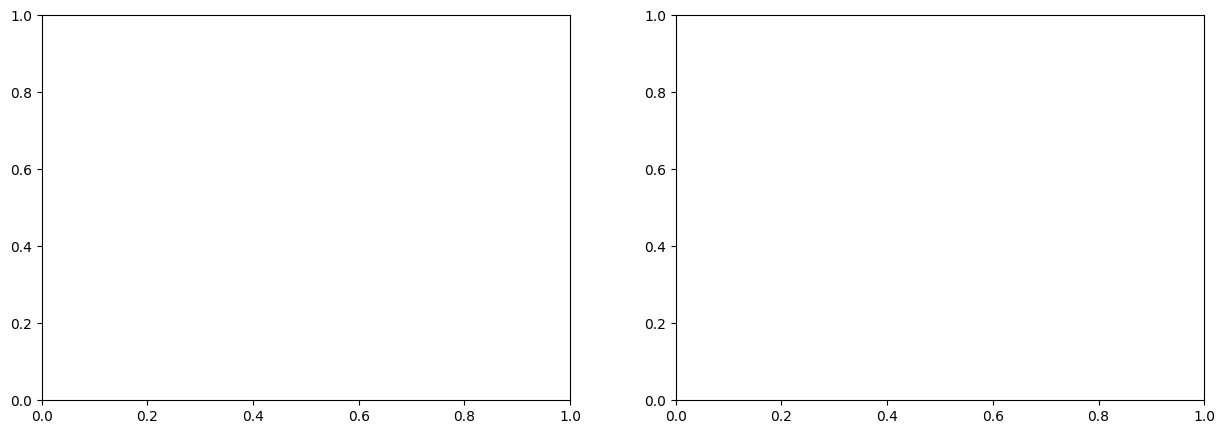

In [7]:
# load effects
round_1_single_mut_effects = []
round_2_single_mut_effects = []

for protein_concentration_1 in protein_concentrations:
    for protein_concentration_2 in protein_concentrations:
        round_1_single_mut_effects.append(np.log(np.loadtxt(path + f"target1_{protein_concentration_1}_target2_{protein_concentration_2}/round_1/effects.csv", delimiter=",")))
        round_2_single_mut_effects.append(np.log(np.loadtxt(path + f"target1_{protein_concentration_1}_target2_{protein_concentration_2}/round_1/effects.csv", delimiter=",")))

# set up 2 subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# plot ground_truth vs round_1_single_mut_effects
for i in range(0,len(protein_concentrations)**2, 3):
    axes[0].scatter(ground_truth, round_1_single_mut_effects[i], alpha=0.5)
# set x and y labels
axes[0].set_xlabel('$K_{m_i}$', fontsize=20)
axes[0].set_ylabel('$\widehat{K_{m_i}}$', fontsize=20)
# set title
axes[0].set_title('Round 1', fontsize=20)
# plot 1:1 line
axes[0].plot([np.min(ground_truth), np.max(ground_truth)], [np.min(ground_truth), np.max(ground_truth)], color='black')
# add MIME text top left
axes[0].text(0.8, 0.1, 'MIME', horizontalalignment='center', verticalalignment='center', transform=axes[0].transAxes, fontsize=15)
# add legend
axes[0].legend(['$B_{tot} = 0.1$', '$B_{tot} = 1$', '$B_{tot} = 10$'], fontsize=10)

# plot round_2 single mutation effects vs ground truth
for i in range(len(protein_concentrations)**2):
    axes[1].scatter(ground_truth, round_2_single_mut_effects[i], alpha=0.5)
# set x and y labels
axes[1].set_xlabel('$K_{m_i}$', fontsize=20)
axes[1].set_ylabel('$\widehat{K_{m_i}}$', fontsize=20)
# set title
axes[1].set_title('Round 2', fontsize=20)
# plot 1:1 line
axes[1].plot([np.min(ground_truth), np.max(ground_truth)], [np.min(ground_truth), np.max(ground_truth)], color='black')
# add MIME text top left
axes[1].text(0.8, 0.1, 'MIME', horizontalalignment='center', verticalalignment='center', transform=axes[1].transAxes, fontsize=15)
# add legend
axes[1].legend(['$B_{tot} = \{0.1, 0.1\}$', '$B_{tot} = \{0.1, 1\}$', '$B_{tot} = \{0.1, 10\}$', '$B_{tot} = \{1, 0.1\}$', '$B_{tot} = \{1, 1\}$', '$B_{tot} = \{1, 10\}$', '$B_{tot} = \{10, 0.1\}$', '$B_{tot} = \{10, 1\}$', '$B_{tot} = \{10, 10\}$'], fontsize=10)

plt.show()